In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download es_core_news_lg
!pip install contractions
!pip install emoji
!pip install emot
!pip install seaborn
!pip install DeepMoji



     |████████████████████████████████| 1.6 MB 7.6 MB/s 
     |████████████████████████████████| 819 kB 50.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 5.8 MB 7.7 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 10.1 MB 27.7 MB/s 
     |████████████████████████████████| 456 kB 45.9 MB/s 
     |████████████████████████████████| 623 kB 31.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 568.4 MB 12 kB/s 
✔ Download and installation successful
You can

In [53]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  
import string
import contractions
from emoji import emojize
from nltk.stem import WordNetLemmatizer 
from datetime import datetime
import emot
from nltk.corpus import wordnet
import os
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('treebank')
from nltk.text import Text
from nltk.tokenize import word_tokenize,sent_tokenize
import collections
import matplotlib.pyplot as plt
import seaborn as sbn
#import DeepMoji
import string
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [ ]:
#Import the fisrt DF '1May'

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/1Mayo_ENGLISH_tweets_stweet.csv')
df1.head()

,created_at,id_str,conversation_id_str,full_text,lang,favorited,retweeted,retweet_count,favorite_count,reply_count,quote_count,quoted_status_id_str,quoted_status_short_url,quoted_status_expand_url,user_id_str,user_name,user_full_name,user_verified,in_reply_to_status_id_str,in_reply_to_user_id_str,hashtags,mentions,urls,media
0,2021-04-23T07:14:36+00:00,1385492282971987968,1385492282971987968,📢Join the seminar aiming at supporting #1May #...,en,False,False,5,4,0,1,NaN,NaN,NaN,1054637281389223936,_EuropeanForum,European Forum,False,NaN,NaN,"#1May , #1maggio , #1Mayo","LeftHeinz , Yolanda_Diaz_ , VisentiniLuca , lu...",NaN,"[{""url"": ""https://pbs.twimg.com/media/EzpAFBfX..."
1,2021-04-22T04:12:43+00:00,1385084126307528709,1384884688829943809,@julioacosta1701 @DiazCanelB @AlejandroGilF @r...,es,False,False,7,1,0,0,NaN,NaN,NaN,1210365797702492160,BauzaCuba,Alejandro Rodríguez Bauza,False,1.384885e+18,1.194288e+18,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","julioacosta1701 , DiazCanelB , AlejandroGilF ,...",NaN,[]
2,2021-04-22T04:12:00+00:00,1385083944001998850,1384803265381031938,@julioacosta1701 @AliRubioGlez @Vicente7397772...,es,False,False,7,1,0,0,NaN,NaN,NaN,1210365797702492160,BauzaCuba,Alejandro Rodríguez Bauza,False,1.384889e+18,1.194288e+18,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","julioacosta1701 , AliRubioGlez , Vicente739777...",NaN,[]
3,2021-04-22T04:09:48+00:00,1385083390022586370,1384882418755178498,@AdrinMartnezGo1 @julioacosta1701 @DiazCanelB ...,es,False,False,6,0,0,0,NaN,NaN,NaN,1210365797702492160,BauzaCuba,Alejandro Rodríguez Bauza,False,1.385057e+18,1.136331e+18,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","AdrinMartnezGo1 , julioacosta1701 , DiazCanelB...",NaN,[]
4,2021-04-22T03:32:26+00:00,1385073986363658244,1384941470390661126,@VilmaPrez14 @Laura53538740 @Granma_Digital @D...,es,False,False,5,1,0,1,NaN,NaN,NaN,1210365797702492160,BauzaCuba,Alejandro Rodríguez Bauza,False,1.384977e+18,1.101197e+18,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","VilmaPrez14 , Laura53538740 , Granma_Digital ,...",NaN,[]


In [5]:
df1.dtypes #Checking data type

created_at                    object
id_str                         int64
conversation_id_str            int64
full_text                     object
lang                          object
favorited                       bool
retweeted                       bool
retweet_count                  int64
favorite_count                 int64
reply_count                    int64
quote_count                    int64
quoted_status_id_str         float64
quoted_status_short_url      float64
quoted_status_expand_url     float64
user_id_str                    int64
user_name                     object
user_full_name                object
user_verified                   bool
in_reply_to_status_id_str    float64
in_reply_to_user_id_str      float64
hashtags                      object
mentions                      object
urls                          object
media                         object
dtype: object

In [6]:
colombia_tweets = df1['hashtags'] #selecting the column to analize 


In [ ]:
#preprocessing column text 

In [7]:
from nltk.tokenize import word_tokenize  
word_tokens = []
for sent in colombia_tweets:
    word_tokens.append(word_tokenize(sent))
 

In [8]:
from nltk.tokenize import WordPunctTokenizer
punct_tokenizer = WordPunctTokenizer()
punct_tokens = []
for sent in colombia_tweets:
    punct_tokens.append(punct_tokenizer.tokenize(sent))
 

In [9]:
from nltk.tokenize import RegexpTokenizer
match_tokenizer = RegexpTokenizer("[\w']+")
match_tokens = []
for sent in colombia_tweets:   
    match_tokens.append(match_tokenizer.tokenize(sent))

In [10]:
space_tokenizer = RegexpTokenizer("\s+", gaps=True)
space_tokens = []
for sent in colombia_tweets:
    space_tokens.append(space_tokenizer.tokenize(sent))

In [11]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tweet_tokens = []
for sent in colombia_tweets:
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))

In [12]:
tokenizers = {'word_tokenize': word_tokens,
             'WordPunctTokenize':punct_tokens,
             'RegrexTokenizer for matching':match_tokens,
             'RegrexTokenizer for white space': space_tokens,
             'TweetTokenizer': tweet_tokens }
df_colombia1 = pd.DataFrame.from_dict(tokenizers)

In [19]:
df_colombia1# Creating a Df with the different variables


,word_tokenize,WordPunctTokenize,RegrexTokenizer for matching,RegrexTokenizer for white space,TweetTokenizer
0,"[#, 1May, ,, #, 1maggio, ,, #, 1Mayo]","[#, 1May, ,, #, 1maggio, ,, #, 1Mayo]","[1May, 1maggio, 1Mayo]","[#1May, ,, #1maggio, ,, #1Mayo]","[#1May, ,, #1maggio, ,, #1Mayo]"
1,"[#, PrevenirPorLaVida, ,, #, PatriaOMuerte, ,,...","[#, PrevenirPorLaVida, ,, #, PatriaOMuerte, ,,...","[PrevenirPorLaVida, PatriaOMuerte, UnBlockCuba...","[#PrevenirPorLaVida, ,, #PatriaOMuerte, ,, #Un...","[#PrevenirPorLaVida, ,, #PatriaOMuerte, ,, #Un..."
2,"[#, PrevenirPorLaVida, ,, #, PatriaOMuerte, ,,...","[#, PrevenirPorLaVida, ,, #, PatriaOMuerte, ,,...","[PrevenirPorLaVida, PatriaOMuerte, UnBlockCuba...","[#PrevenirPorLaVida, ,, #PatriaOMuerte, ,, #Un...","[#PrevenirPorLaVida, ,, #PatriaOMuerte, ,, #Un..."
3,"[#, PrevenirPorLaVida, ,, #, PatriaOMuerte, ,,...","[#, PrevenirPorLaVida, ,, #, PatriaOMuerte, ,,...","[PrevenirPorLaVida, PatriaOMuerte, UnBlockCuba...","[#PrevenirPorLaVida, ,, #PatriaOMuerte, ,, #Un...","[#PrevenirPorLaVida, ,, #PatriaOMuerte, ,, #Un..."
4,"[#, PrevenirPorLaVida, ,, #, PatriaOMuerte, ,,...","[#, PrevenirPorLaVida, ,, #, PatriaOMuerte, ,,...","[PrevenirPorLaVida, PatriaOMuerte, UnBlockCuba...","[#PrevenirPorLaVida, ,, #PatriaOMuerte, ,, #Un...","[#PrevenirPorLaVida, ,, #PatriaOMuerte, ,, #Un..."
...,...,...,...,...,...
4497,"[#, Paro1M, ,, #, 1Mayo, ,, #, CALIRESISTENCIA]","[#, Paro1M, ,, #, 1Mayo, ,, #, CALIRESISTENCIA]","[Paro1M, 1Mayo, CALIRESISTENCIA]","[#Paro1M, ,, #1Mayo, ,, #CALIRESISTENCIA]","[#Paro1M, ,, #1Mayo, ,, #CALIRESISTENCIA]"
4498,"[#, ParoIndefinido, ,, #, Paro1M, ,, #, Paro1M...","[#, ParoIndefinido, ,, #, Paro1M, ,, #, Paro1M...","[ParoIndefinido, Paro1M, Paro1Mayo, 1Mayo, 1Ma...","[#ParoIndefinido, ,, #Paro1M, ,, #Paro1Mayo, ,...","[#ParoIndefinido, ,, #Paro1M, ,, #Paro1Mayo, ,..."
4499,"[#, maydaysea, ,, #, MayDay2021, ,, #, MayDay,...","[#, maydaysea, ,, #, MayDay2021, ,, #, MayDay,...","[maydaysea, MayDay2021, MayDay, SeattleProtest...","[#maydaysea, ,, #MayDay2021, ,, #MayDay, ,, #S...","[#maydaysea, ,, #MayDay2021, ,, #MayDay, ,, #S..."
4500,"[#, Seattle, ,, #, WA, ,, #, antireport, ,, #,...","[#, Seattle, ,, #, WA, ,, #, antireport, ,, #,...","[Seattle, WA, antireport, MayDay, 1mai, 1Mayis...","[#Seattle, ,, #WA, ,, #antireport, ,, #MayDay,...","[#Seattle, ,, #WA, ,, #antireport, ,, #MayDay,..."


In [14]:
tweets = df_colombia1['RegrexTokenizer for matching'] # Choose the 

In [37]:
tweets

0                                  [1May, 1maggio, 1Mayo]
1       [PrevenirPorLaVida, PatriaOMuerte, UnBlockCuba...
2       [PrevenirPorLaVida, PatriaOMuerte, UnBlockCuba...
3       [PrevenirPorLaVida, PatriaOMuerte, UnBlockCuba...
4       [PrevenirPorLaVida, PatriaOMuerte, UnBlockCuba...
                              ...                        
4497                     [Paro1M, 1Mayo, CALIRESISTENCIA]
4498    [ParoIndefinido, Paro1M, Paro1Mayo, 1Mayo, 1Ma...
4499    [maydaysea, MayDay2021, MayDay, SeattleProtest...
4500    [Seattle, WA, antireport, MayDay, 1mai, 1Mayis...
4501                           [UnidosHacemosCuba, 1Mayo]
Name: RegrexTokenizer for matching, Length: 4502, dtype: object

In [20]:
preprocessed_data = pd.DataFrame(df_colombia1['RegrexTokenizer for matching'])

In [24]:
preprocessed_data = preprocessed_data.rename(columns={'RegrexTokenizer for matching': 'tweets'})

In [25]:
preprocessed_data.columns

Index(['tweets'], dtype='object')

In [26]:
all_words = list([a for b in preprocessed_data.tweets.tolist() for a in b])
w = collections.Counter(all_words)
new_df = pd.DataFrame.from_dict(w, orient= 'index').reset_index()
new_df.columns = ['Words', 'counts']
new_df = new_df.sort_values('counts', ascending = False)

In [27]:
plt.rcParams["figure.figsize"] = (20,6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '1st_may hashtag Barplot')

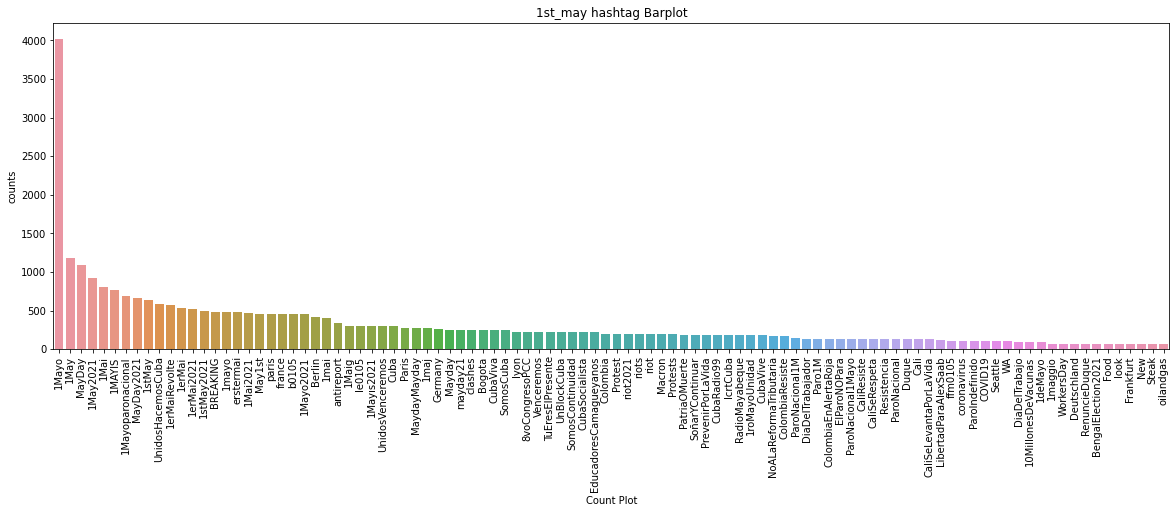

In [37]:
import seaborn as sns 
ax = sns.barplot(new_df.Words[:100], new_df.counts[:100])
plt.xticks(rotation = 90)
ax.set_xlabel("Count Plot")
ax.set_title('1st_may hashtag Barplot')

In [83]:
s = str(all_words)


In [64]:
english_stops = set( nltk.corpus.stopwords.words('english'))
english_stops.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '1Mayo', '1May', 'May1st', '1Mai', '1Mayis', '1May', 'paris', 'Berlin', '1stMay', '1Mayis', 'france', 'Paris'])

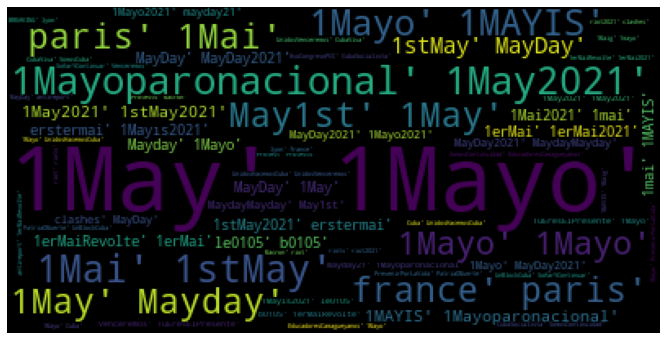

In [80]:
wordcloud = WordCloud(max_font_size=80, stopwords = english_stops ).generate(s)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()